In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,Voltage (V)
0,0.002353
1,-0.017722
2,0.004940
3,-0.005499
4,0.014261
...,...
99995,0.007360
99996,-0.006720
99997,-0.010976
99998,-0.008360


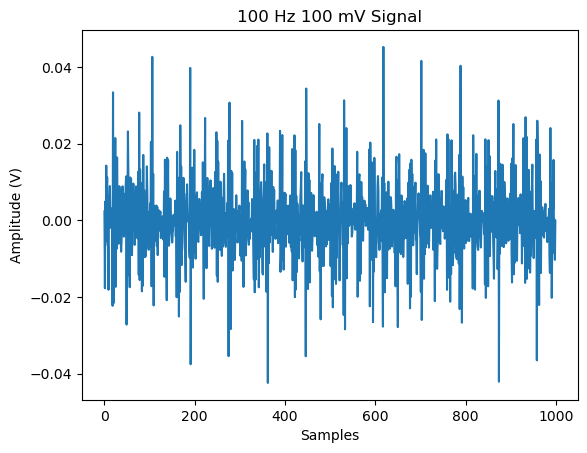

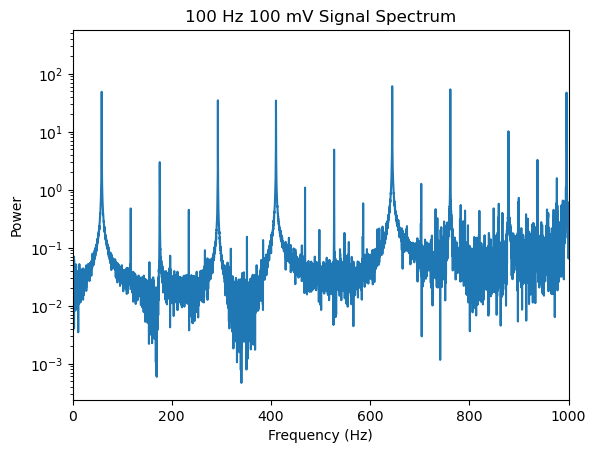

In [51]:
path = 'data/scan.csv'
data = pd.read_csv(path)

data_volts = data['Voltage (V)']
sample_rate = int(1e4)
display(data)
plt.plot(data_volts[0:1000])
plt.title('100 Hz 100 mV Signal')
plt.ylabel('Amplitude (V)')
plt.xlabel('Samples')
plt.show()

data_fft = np.fft.rfft(data_volts)
data_fftfreq = np.fft.rfftfreq(len(data_volts),1./sample_rate)
plt.plot(data_fftfreq, np.abs(data_fft))
plt.xlim(0,1000)
plt.title('100 Hz 100 mV Signal Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
#plt.plot([60,60], [0, 400])
plt.yscale('log')
#plt.xscale('log')
plt.show()